In [133]:
from torch.utils.data import Dataset, DataLoader
import torch
import numpy as np
import math

class load_whole_data(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, path: str, ind: list):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = "cpu"
        self.imgs_path = path
        self.data = []
        for i in ind:
            self.data.append([self.imgs_path + f"/model_input ({i}).pt",
                        self.imgs_path + f"/model_target ({i}).pt"])

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        input_path, target_path = self.data[idx] # path for target + input

        inp = torch.load(input_path) # load the input data
        inp = inp.type(torch.float).to(self.device)

        tar = torch.load(target_path) # load the target data
        tar = tar.type(torch.float).to(self.device)

        return inp, tar



        
class load_shuffle_5_min(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, ls: list, device):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = device
        self.ls = ls # list with the input and target data
        self.size = (ls[0][0].shape[0], ls[0][0].shape[1]) # size of target and input
        
        length = math.floor((self.size[1]/(200*60*5)))*self.size[0] # the amount of total possible cuts
        self.length = int(min((75 - 75 % self.size[0]), length))
        
        self.gen = iter(self.create_data(self.length))
        
        #print(self.length)

    

    def create_data(self, nr_of_cuts):       
        cut_point = np.random.randint(low = 200*60*0.5, high = self.size[1] - 200*60*5, 
                          size = nr_of_cuts) # choose the place to cut
        
        cuts_pr_chan = nr_of_cuts/self.size[0] # the amount of cuts pr channel
        
        for i in range(nr_of_cuts):
            inp = self.ls[0][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*200*5]
            tar = self.ls[1][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*200*5]
            yield (inp, tar)
    
    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        inp, tar = next(self.gen)
        inp = inp.to(self.device)
        tar = tar.to(self.device)
        return inp, tar

    
    
class load_shuffle_5_min_all(Dataset): 
    """
    This dataloader loads the tensor input and target in whole
    """
    def __init__(self, ls: list, device):
        """
        Args:
            path (str): path to the input & target folder.
            ind (list): list of indices for which pictures to load.
            device (class 'torch.device'): which pytorch device the data should
            be sent to.
        """

        self.device = device
        self.ls = ls # list with the input and target data
        self.size = (ls[0][0].shape[0], ls[0][0].shape[1]) # size of target and input
        
        self.length = math.floor((self.size[1]/(200*60*5)))*self.size[0] # the amount of total possible cuts

        
        self.gen = iter(self.create_data(self.length))
        #print(self.length)

    

    def create_data(self, nr_of_cuts):       
        cut_point = np.random.randint(low = 200*60*0.5, high = self.size[1] - 200*60*5, 
                          size = nr_of_cuts) # choose the place to cut
        
        cuts_pr_chan = nr_of_cuts/self.size[0] # the amount of cuts pr channel
        
        for i in range(nr_of_cuts):
            inp = self.ls[0][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*200*5]
            tar = self.ls[1][0][int(i//cuts_pr_chan)][cut_point[i]:cut_point[i]+60*200*5]
            yield (inp, tar)
    
    def __len__(self):
        return self.length

    def __getitem__(self, idx):
        inp, tar = next(self.gen)
        inp = inp.to(self.device)
        tar = tar.to(self.device)
        return inp, tar


In [134]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data/train_model_data", ind = [i for i in range(1, 195 + 1)])
batch_size = 1

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)
load = iter(trainloader)

loader2 = load_shuffle_5_min(next(load), "cpu")
batch_size = 1

# Set up the dataloaders:

loader2 = torch.utils.data.DataLoader(loader2,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          num_workers=0)

load2 = iter(loader2)

j = 0
for i in loader2:
    j += 1

print("j =", j)

cuda
j = 66


In [135]:
import time


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data/train_model_data", ind = [i for i in range(1, 195 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cuda
time: 17.621077060699463
Number of files loaded in total: 195


In [136]:
import time


device = "cpu"
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data/train_model_data", ind = [i for i in range(1, 195 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data_before = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min_all(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data_before.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cpu
time: 16.16476821899414
Number of files loaded in total: 195


In [137]:
import csv
import re

path = "C:/Users/Marc/Desktop/model_data/train_model_data"

patient_samples = dict()

files = [] # read the old encoding file so that new ones can be made


with open(path + '/train_encoding.csv', 'r') as file:
    ls = csv.reader(file)
    for rows in ls:
        files.append(rows)
        m = re.match(r".+/\d+/(\d+)/+.", rows[0])
        val_to_dict = patient_samples.get(m.group(1), [])
        val_to_dict.append(rows[2])
        patient_samples[m.group(1)] = val_to_dict

In [138]:
patient_bevore = []

for value in patient_samples.values():
    vals = 0
    for i in value:
        vals += data_before[int(i)-1]
    
    patient_bevore.append(vals)

110.56551724137931
88.0


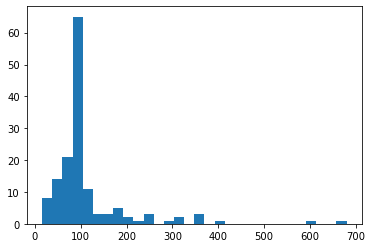

In [139]:
import matplotlib.pyplot as plt
m = plt.hist(patient_bevore, bins = 30)

print(np.mean(patient_bevore))
print(np.median(patient_bevore))

In [100]:
np.mean(np.array(patient_bevore) > 88)

0.2620689655172414

82.21538461538462
88.0


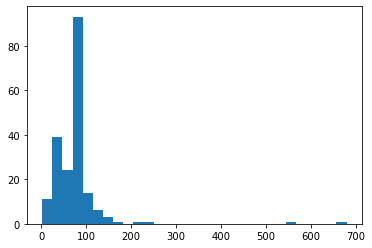

In [132]:
import matplotlib.pyplot as plt
m = plt.hist(data_before, bins = 30)

print(np.mean(data_before))
print(np.median(data_before))

In [91]:
import time


device = "cpu"
print(device)

trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data/train_model_data", ind = [i for i in range(1, 195 + 1)])

# Set up the dataloaders:

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)

data_after = []

nr_of_files_loaded = 0

batch_size = 1

start = time.time()

for file in trainloader:
    loader2 = load_shuffle_5_min(file, device)
    loader2 = torch.utils.data.DataLoader(loader2,
                                              batch_size=batch_size,
                                              shuffle=True,
                                              num_workers=0)
    nr_of_files_loaded += 1
    j = 0
    for i in loader2:
        j += 1
    
    data_after.append(j)

print("time:", time.time()-start)
    
print("Number of files loaded in total:", nr_of_files_loaded)

cpu
time: 14.908121109008789
Number of files loaded in total: 195


Lets do the data analysis before we did the corrections:

In [92]:
patient_after = []

for value in patient_samples.values():
    vals = 0
    for i in value:
        vals += data_after[int(i)-1]
    
    patient_after.append(vals)

77.78620689655172
66.0


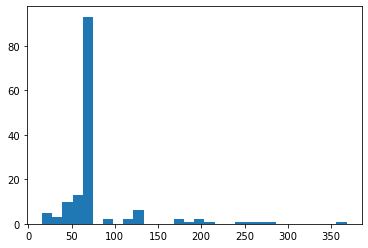

In [93]:
import matplotlib.pyplot as plt
m = plt.hist(patient_after, bins = 30)

print(np.mean(patient_after))
print(np.median(patient_after))

In [101]:
np.mean(np.array(patient_after) > 66)

0.1724137931034483

57.84102564102564
66.0


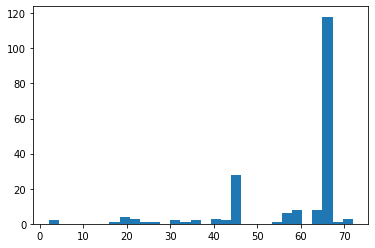

In [95]:
import matplotlib.pyplot as plt
m = plt.hist(data_after, bins = 30)

print(np.mean(data_after))
print(np.median(data_after))

In [112]:
trainload = load_whole_data(path = "C:/Users/Marc/Desktop/model_data/train_model_data", ind = [i for i in range(1, 195 + 1)])

trainloader = torch.utils.data.DataLoader(trainload,
                                          batch_size=1,
                                          shuffle=False,
                                          num_workers=0)
d = dict()
J = 0
for file in trainloader:
    J += 1
    d[J] = file[0].shape[2]
   

195


In [128]:
new_dict = dict()

for values in patient_samples.values():
    vals = 0
    for i in values:
        vals += d[int(i)]
    
    for i in values:
        new_dict[int(i)] = [vals, len(values)]

In [130]:
import pickle

with open('train_series_length.pickle', 'wb') as handle:
    pickle.dump(new_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [125]:
with open('train_series_length.pickle', 'rb') as handle:
    jo = pickle.load(handle)

print(jo)

{1: 290000, 2: 565400, 3: 565400, 4: 565400, 5: 285800, 6: 241400, 7: 280600, 8: 561400, 9: 561400, 10: 561400, 11: 250200, 12: 159800, 13: 120200, 14: 270800, 15: 494800, 16: 494800, 17: 238200, 18: 298200, 19: 534400, 20: 534400, 21: 243400, 22: 241400, 23: 331000, 24: 331000, 25: 282000, 26: 1032400, 27: 1032400, 28: 238200, 29: 239600, 30: 825000, 31: 825000, 32: 825000, 33: 825000, 34: 825000, 35: 236400, 36: 974200, 37: 974200, 38: 974200, 39: 974200, 40: 1079000, 41: 1079000, 42: 1079000, 43: 1079000, 44: 1079000, 45: 251000, 46: 241000, 47: 235600, 48: 243000, 49: 766000, 50: 766000, 51: 766000, 52: 240200, 53: 236000, 54: 241600, 55: 531600, 56: 531600, 57: 241600, 58: 255000, 59: 230400, 60: 256800, 61: 274200, 62: 360800, 63: 143000, 64: 249200, 65: 238200, 66: 252600, 67: 244400, 68: 276800, 69: 287400, 70: 1673800, 71: 1673800, 72: 120200, 73: 480800, 74: 480800, 75: 480800, 76: 480800, 77: 242000, 78: 120200, 79: 1342000, 80: 1342000, 81: 1342000, 82: 1342000, 83: 1342000

In [146]:
import pickle

with open('train_series_length.pickle', 'rb') as handle:
    to = pickle.load(handle)

print(to)

{1: [290000, 1], 2: [565400, 3], 3: [565400, 3], 4: [565400, 3], 5: [285800, 1], 6: [241400, 1], 7: [280600, 1], 8: [561400, 3], 9: [561400, 3], 10: [561400, 3], 11: [250200, 1], 12: [159800, 1], 13: [120200, 1], 14: [270800, 1], 15: [494800, 2], 16: [494800, 2], 17: [238200, 1], 18: [298200, 1], 19: [534400, 2], 20: [534400, 2], 21: [243400, 1], 22: [241400, 1], 23: [331000, 2], 24: [331000, 2], 25: [282000, 1], 26: [1032400, 2], 27: [1032400, 2], 28: [238200, 1], 29: [239600, 1], 30: [825000, 5], 31: [825000, 5], 32: [825000, 5], 33: [825000, 5], 34: [825000, 5], 35: [236400, 1], 36: [974200, 4], 37: [974200, 4], 38: [974200, 4], 39: [974200, 4], 40: [1079000, 5], 41: [1079000, 5], 42: [1079000, 5], 43: [1079000, 5], 44: [1079000, 5], 45: [251000, 1], 46: [241000, 1], 47: [235600, 1], 48: [243000, 1], 49: [766000, 3], 50: [766000, 3], 51: [766000, 3], 52: [240200, 1], 53: [236000, 1], 54: [241600, 1], 55: [531600, 2], 56: [531600, 2], 57: [241600, 1], 58: [255000, 1], 59: [230400, 1]

In [147]:
with open('C:/Users/Marc/Desktop/model_data/train_model_data/train_series_length.pickle', 'rb') as handle:
    jo = pickle.load(handle)

print(jo)

{1: [290000, 1], 2: [565400, 3], 3: [565400, 3], 4: [565400, 3], 5: [285800, 1], 6: [241400, 1], 7: [280600, 1], 8: [561400, 3], 9: [561400, 3], 10: [561400, 3], 11: [250200, 1], 12: [159800, 1], 13: [120200, 1], 14: [270800, 1], 15: [494800, 2], 16: [494800, 2], 17: [238200, 1], 18: [298200, 1], 19: [534400, 2], 20: [534400, 2], 21: [243400, 1], 22: [241400, 1], 23: [331000, 2], 24: [331000, 2], 25: [282000, 1], 26: [1032400, 2], 27: [1032400, 2], 28: [238200, 1], 29: [239600, 1], 30: [825000, 5], 31: [825000, 5], 32: [825000, 5], 33: [825000, 5], 34: [825000, 5], 35: [236400, 1], 36: [974200, 4], 37: [974200, 4], 38: [974200, 4], 39: [974200, 4], 40: [1079000, 5], 41: [1079000, 5], 42: [1079000, 5], 43: [1079000, 5], 44: [1079000, 5], 45: [251000, 1], 46: [241000, 1], 47: [235600, 1], 48: [243000, 1], 49: [766000, 3], 50: [766000, 3], 51: [766000, 3], 52: [240200, 1], 53: [236000, 1], 54: [241600, 1], 55: [531600, 2], 56: [531600, 2], 57: [241600, 1], 58: [255000, 1], 59: [230400, 1]

In [148]:
jo == to

True

In [149]:
with open('C:/Users/Marc/Desktop/model_data/val_model_data/val_series_length.pickle', 'rb') as handle:
    jo = pickle.load(handle)

print(jo)

{1: [537200, 2], 2: [537200, 2], 3: [247800, 1], 4: [110000, 1], 5: [240400, 1], 6: [273800, 1], 7: [236000, 1], 8: [240600, 1], 9: [246200, 1], 10: [243000, 1], 11: [249200, 1], 12: [549200, 1], 13: [238600, 1], 14: [246200, 1], 15: [242200, 1], 16: [945800, 3], 17: [945800, 3], 18: [945800, 3], 19: [234200, 1], 20: [240800, 1], 21: [239400, 1], 22: [238200, 1], 23: [243200, 1], 24: [238000, 1], 25: [446400, 2], 26: [446400, 2], 27: [575000, 2], 28: [575000, 2]}


In [158]:
ls = []
jes = 0
for i in range(19):
    ls.append([i, jes if jes else 10])

print(ls)

[[0, 10], [1, 10], [2, 10], [3, 10], [4, 10], [5, 10], [6, 10], [7, 10], [8, 10], [9, 10], [10, 10], [11, 10], [12, 10], [13, 10], [14, 10], [15, 10], [16, 10], [17, 10], [18, 10]]
